<a href="https://colab.research.google.com/github/davidalejo04/JsonDemoi/blob/main/Homicidios_Antioquia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATASET DE ASESINATOS EN ANTIOQUIA**

Se toman de https://www.datos.gov.co/

1. Cargamos los dato desde la API

In [ ]:
!pip install sodapy

import pandas as pd
from sodapy import Socrata
import matplotlib.pyplot as plt
import numpy as np

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("www.datos.gov.co", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(www.datos.gov.co,
#                  MyAppToken,
#                  username="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("vtub-3de2", limit=500000)


2. Convertimos a DataFrame

In [ ]:
# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_dff=results_df['departamento_del_hecho_dane']=='Antioquia'
results_df2=results_df[results_dff]
results_df2=pd.DataFrame(results_df2)


3. Vemos los campos del dataframe

In [ ]:
Describe=pd.DataFrame(results_df2).describe()
print(Describe)


            id a_o_del_hecho grupo_de_edad_quinquenal  \
count    18852         18852                    18852   
unique   18852            10                       19   
top     121766          2018                (20 a 24)   
freq         1          2275                     3846   

            grupo_mayor_menor_de_edad grupo_de_edad_judicial  \
count                           18852                  18852   
unique                              5                     19   
top     b) Mayores de Edad (>18 años)              (20 a 24)   
freq                            16194                   3846   

              ciclo_vital sexo_de_la_victima estado_civil pais_de_nacimiento  \
count               18852              18852        18852              18852   
unique                  7                  3           10                 37   
top     (29 a 59) Adultez             Hombre   Soltero(a)           Colombia   
freq                 9041              17401         7908              17

4. Limitamos Resultados

In [ ]:
results_df2=results_df2.groupby(['a_o_del_hecho','sexo_de_la_victima','grupo_de_edad_quinquenal','escolaridad','municipio_del_hecho_dane','mecanismo_causal_de_la_lesion_fatal'],as_index=False)[['id']].count()
#results_df2f=results_df2[(results_df2['municipio_del_hecho_dane']=='Medellín')]
results_df2f=results_df2
results_df2f=pd.DataFrame(results_df2f).reset_index()
results_df2f=results_df2f.drop(['index'],axis=1)
print(results_df2f)

      a_o_del_hecho sexo_de_la_victima grupo_de_edad_quinquenal  \
0              2015             Hombre                (00 a 04)   
1              2015             Hombre                (00 a 04)   
2              2015             Hombre                (10 a 14)   
3              2015             Hombre                (10 a 14)   
4              2015             Hombre                (10 a 14)   
...             ...                ...                      ...   
12455          2024              Mujer                (65 a 69)   
12456          2024              Mujer                (70 a 74)   
12457          2024              Mujer                (70 a 74)   
12458          2024              Mujer                (75 a 79)   
12459          2024              Mujer               (80 y más)   

                                       escolaridad municipio_del_hecho_dane  \
0                                        No aplica                 El Bagre   
1                                    

5. Describimos los datos

In [ ]:
describe2=results_df2f.drop('id',axis=1).describe()
print(describe2)

       a_o_del_hecho sexo_de_la_victima grupo_de_edad_quinquenal  \
count          12460              12460                    12460   
unique            10                  3                       19   
top             2021             Hombre                (20 a 24)   
freq            1418              11087                     2061   

            escolaridad municipio_del_hecho_dane  \
count             12460                    12460   
unique               20                      135   
top     Sin información                 Medellín   
freq               3939                     1761   

       mecanismo_causal_de_la_lesion_fatal  
count                                12460  
unique                                  19  
top             Proyectil de arma de fuego  
freq                                  8115  


Vemos que la mayoria de los hechos durante los ultimo 10 años se producen en Medellin, ejecutados por arma de fuego (65% aprox), para estas condiciones no hay nivel de escolaridad de la victima en su mayoria, las edades rondan entre 20 y 24 años (16%) y la mayoria de personas son hombres (88%). Estos indices fueron muy marcados en el año 2021.

# HISTOGRAMA DE ASESINATOS POR EDADES

(array([ 57., 173., 426., 158., 249., 145.,  43.,  68.,  26.,  22.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

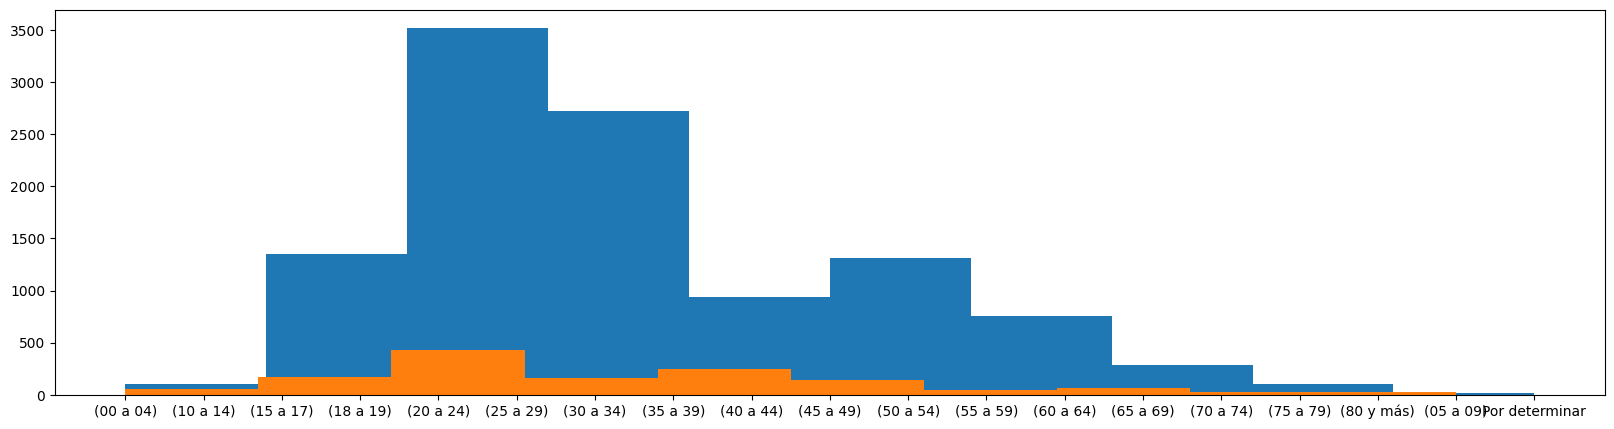

In [ ]:
plt.figure(figsize=(20,5))
labels=results_df2f['sexo_de_la_victima']
plt.hist(results_df2f['grupo_de_edad_quinquenal'][(results_df2f['sexo_de_la_victima']=='Hombre')], bins=10,label="Hombre")
plt.hist(results_df2f['grupo_de_edad_quinquenal'][(results_df2f['sexo_de_la_victima']=='Mujer')], bins=10,label="Mujer")

Se nota algo muy interesante, segun la grafica la mujeres (naranja) empiezan a sufrir hechos de violencia a mas temprana edad que los hombres (azul) ya que la distribucion de las mujeres se es basicamente de la misma forma que la de los hombres pero corrida a la izquierda en el eje de la edad.

In [ ]:
results_df2f['a_o_del_hecho'].value_counts().sort_values()

,count
a_o_del_hecho,
2016,994
2015,1023
2017,1191
2024,1253
2020,1274
2019,1308
2023,1328
2018,1332
2022,1339
